In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from six.moves import urllib
import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf

## Load the Dataset

In [105]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')  # usecols=['survived', 'sex', 'age',
                    # 'n_siblings_spouses', 'parch', 'fare', 'class', 'embark_town', 'alone']) Training data with 'deck' column removed by exclusion from usecols
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # Testing data

In [106]:
dftrain.head()

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


## Remove Specific Column and Place in Variable

In [4]:
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')
print(y_train)
print(y_eval)

0      0
1      1
2      1
3      1
4      0
      ..
622    0
623    0
624    1
625    0
626    0
Name: survived, Length: 627, dtype: int64
0      0
1      0
2      1
3      1
4      1
      ..
259    1
260    0
261    0
262    0
263    1
Name: survived, Length: 264, dtype: int64


## Display Particular Column

In [107]:
print(dftrain['age'])

0      22.0
1      38.0
2      26.0
3      35.0
4      28.0
       ... 
622    28.0
623    25.0
624    19.0
625    28.0
626    32.0
Name: age, Length: 627, dtype: float64


## Locate Specific Row 

In [108]:
print(dftrain.loc[0])

survived                        0
sex                          male
age                          22.0
n_siblings_spouses              1
parch                           0
fare                         7.25
class                       Third
deck                      unknown
embark_town           Southampton
alone                           n
Name: 0, dtype: object


In [7]:
print(y_train.loc[0])

0


## Display General Statistics for a Dataset

In [109]:
dftrain.describe()

,survived,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000,627.000000
mean,0.387560,29.631308,0.545455,0.379585,34.385399
std,0.487582,12.511818,1.151090,0.792999,54.597730
min,0.000000,0.750000,0.000000,0.000000,0.000000
25%,0.000000,23.000000,0.000000,0.000000,7.895800
50%,0.000000,28.000000,0.000000,0.000000,15.045800
75%,1.000000,35.000000,1.000000,0.000000,31.387500
max,1.000000,80.000000,8.000000,5.000000,512.329200


## Display Dataframe Shape

In [110]:
dftrain.shape

(627, 10)

##### The above output indicates the dataframe contains 627 rows/entries, and 9 columns/attributes.

## Show Histogram for a Particular Column

<Axes: >

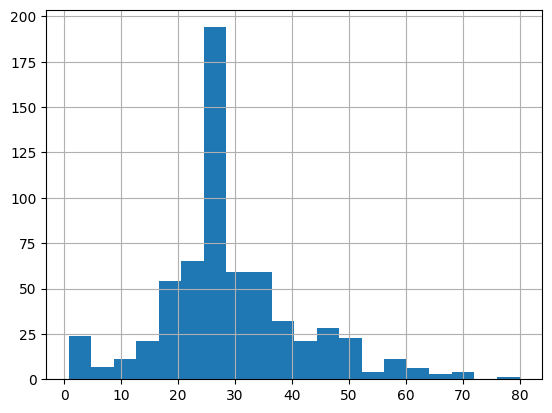

In [10]:
dftrain.age.hist(bins=20)

## Show Horizontal Bar Chart for a Value 

In [111]:
dftrain.sex.value_counts()

male      410
female    217
Name: sex, dtype: int64

<Axes: >

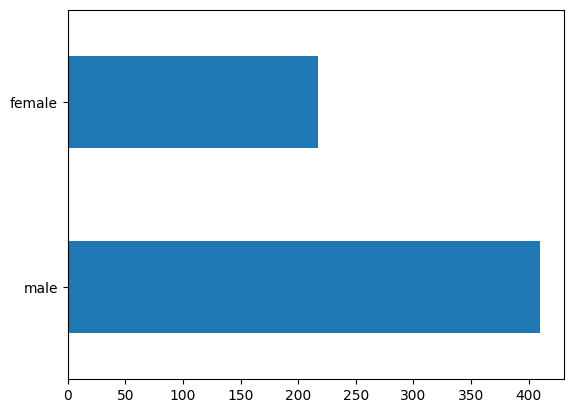

In [112]:
dftrain.sex.value_counts().plot(kind='barh')

<Axes: >

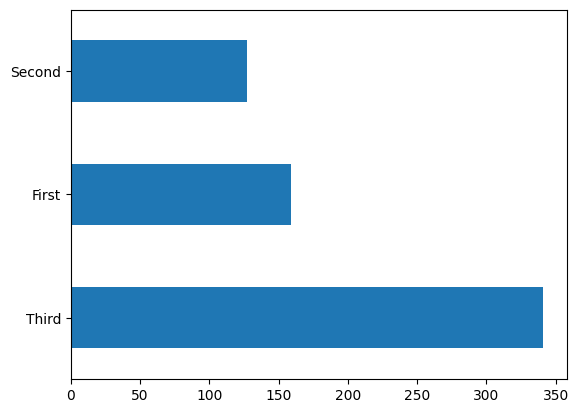

In [113]:
# Since class is a reserved word, an error would be returned when using the above syntax of dftrain.class.value_counts().plot(kind='barh')
# Instead use:

dftrain['class'].value_counts().plot(kind='barh') 

## Combine Dataframes

In [20]:
combined = pd.concat([dftrain, y_train], axis=1)
combined

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone,survived
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n,0
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n,1
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y,1
3,female,35.0,1,0,53.1000,First,C,Southampton,n,1
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y,0
...,...,...,...,...,...,...,...,...,...,...
622,male,28.0,0,0,10.5000,Second,unknown,Southampton,y,0
623,male,25.0,0,0,7.0500,Third,unknown,Southampton,y,0
624,female,19.0,0,0,30.0000,First,B,Southampton,y,1
625,female,28.0,1,2,23.4500,Third,unknown,Southampton,n,0


## Plot Average Survival Rate by Sex

Text(0.5, 0, '% survive')

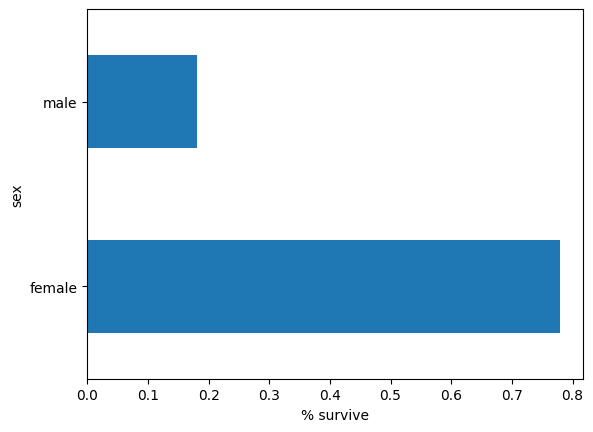

In [21]:
combined.groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')

In [18]:
dfeval.shape

(264, 9)

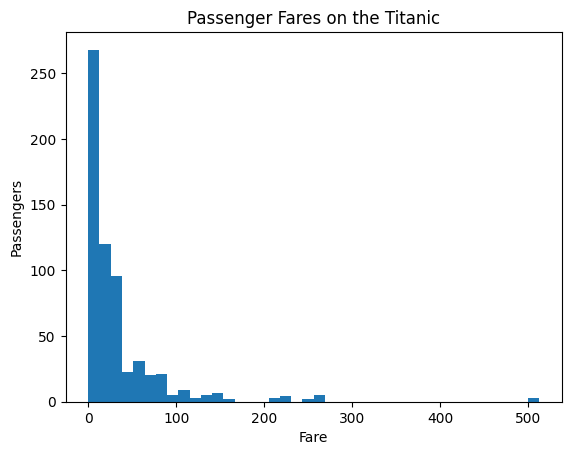

In [31]:
plt.hist(dftrain['fare'], bins=40)
plt.title('Passenger Fares on the Titanic')
plt.xlabel('Fare')
plt.ylabel('Passengers')
plt.show()

In [103]:
dft

0      0
1      1
2      1
3      1
4      0
      ..
622    0
623    0
624    1
625    0
626    0
Name: survived, Length: 627, dtype: int64

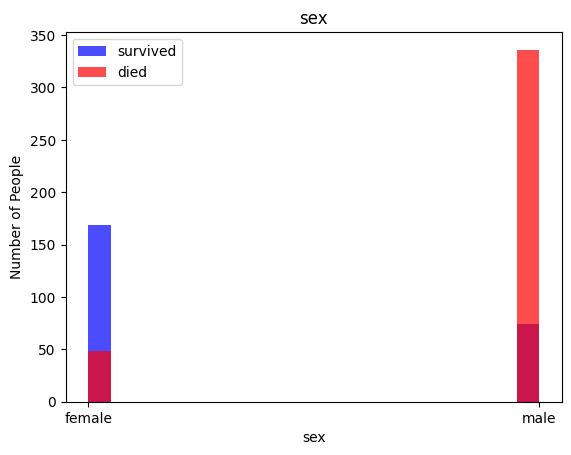

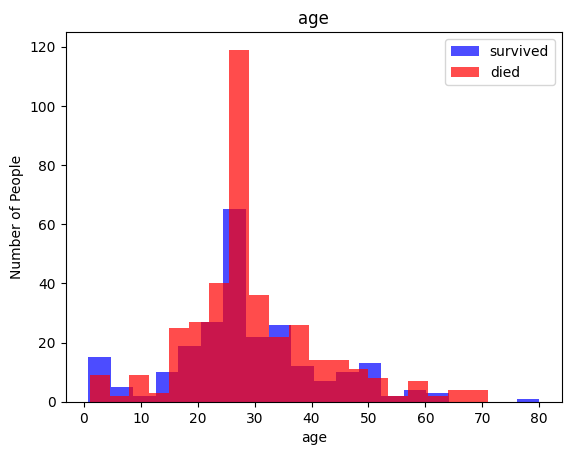

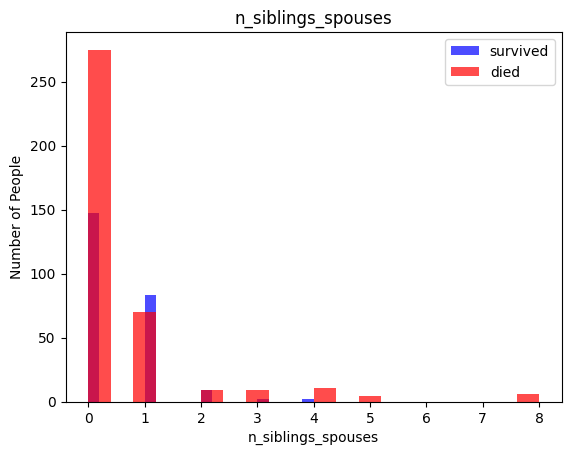

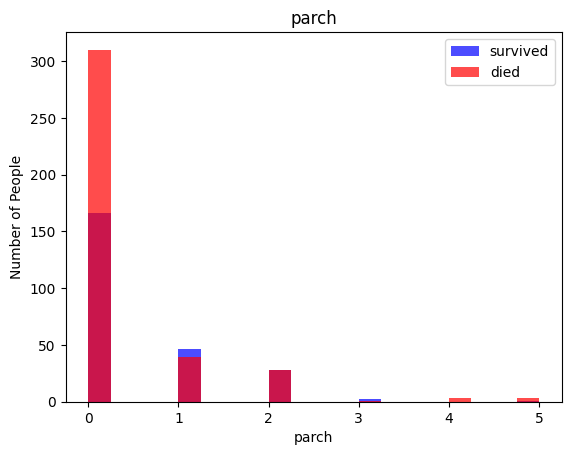

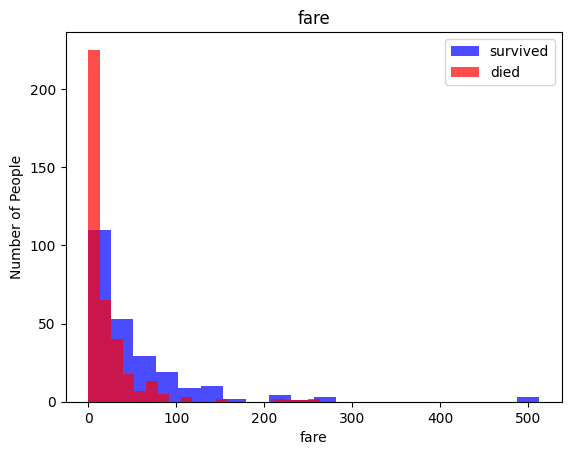

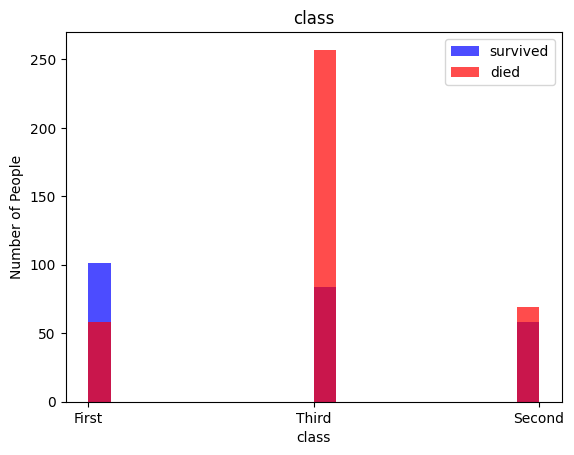

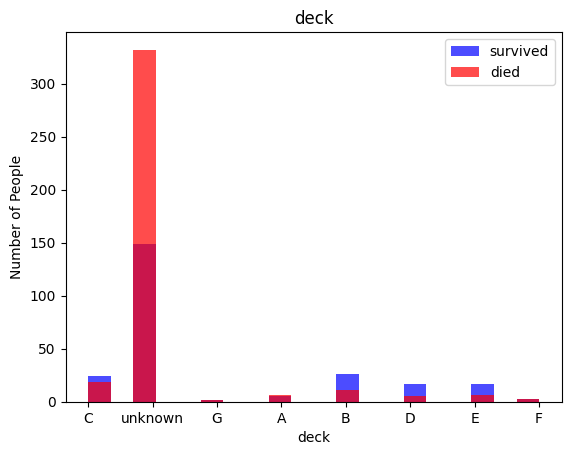

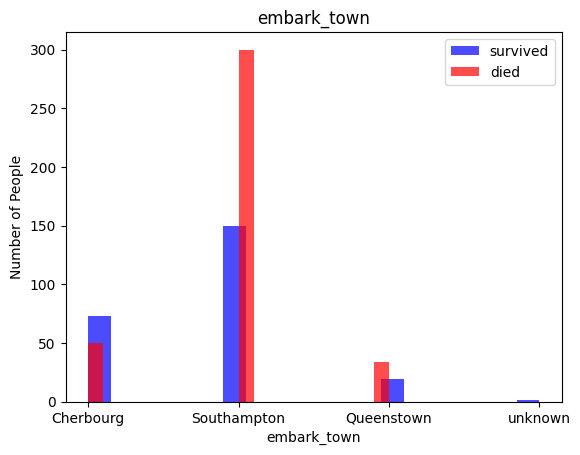

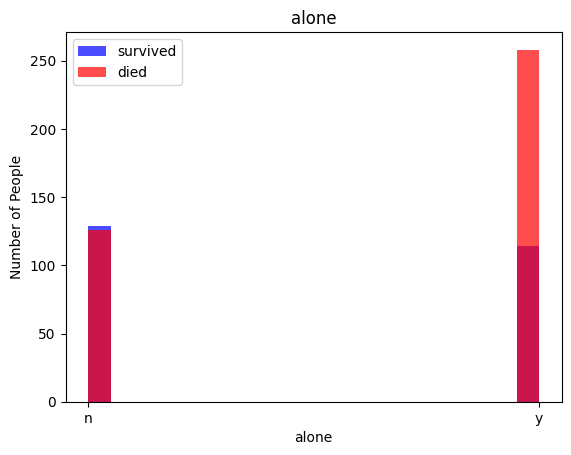

In [121]:
for i in range (len(dftrain.columns)):
    if i == 0:
        continue
    label = dftrain.columns[i]
    plt.hist(dftrain[dftrain['survived']==1][label], color='blue', label='survived', alpha=0.7, bins=20)
    plt.hist(dftrain[dftrain['survived']==0][label], color='red', label='died', alpha=0.7, bins=20)
    plt.title(label)
    plt.ylabel('Number of People')
    plt.xlabel(label)
    plt.legend()
    plt.show()

In [225]:
dftrain

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y
...,...,...,...,...,...,...,...,...,...,...
622,0,male,28.0,0,0,10.5000,Second,unknown,Southampton,y
623,0,male,25.0,0,0,7.0500,Third,unknown,Southampton,y
624,1,female,19.0,0,0,30.0000,First,B,Southampton,y
625,0,female,28.0,1,2,23.4500,Third,unknown,Southampton,n


In [234]:
sh = dftrain.loc[dftrain['embark_town'] == 'Southampton']

In [243]:
sh_survived = sh.loc[sh['survived'] == 1]
sh_died = sh.loc[sh['survived'] == 0]

In [246]:
sh_survived.describe()

,survived,age,n_siblings_spouses,parch,fare
count,150.0,150.000000,150.000000,150.000000,150.000000
mean,1.0,29.062200,0.466667,0.546667,40.241138
std,0.0,13.978223,0.729684,0.840156,45.282052
min,1.0,0.830000,0.000000,0.000000,0.000000
25%,1.0,22.000000,0.000000,0.000000,12.606250
50%,1.0,28.000000,0.000000,0.000000,26.000000
75%,1.0,35.000000,1.000000,1.000000,52.415650
max,1.0,80.000000,4.000000,5.000000,263.000000


In [247]:
sh_died.describe()

,survived,age,n_siblings_spouses,parch,fare
count,300.0,300.000000,300.000000,300.000000,300.000000
mean,0.0,29.646667,0.646667,0.353333,21.456219
std,0.0,11.692342,1.472770,0.858845,30.650770
min,0.0,1.000000,0.000000,0.000000,0.000000
25%,0.0,23.000000,0.000000,0.000000,7.895800
50%,0.0,28.000000,0.000000,0.000000,10.462500
75%,0.0,35.000000,1.000000,0.000000,26.000000
max,0.0,70.000000,8.000000,5.000000,263.000000
